# Combining Active Leaners

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mclearn.tools import log
from mclearn.train import run_active_expt, load_results
from matplotlib.ticker import FuncFormatter
plt.style.use('ggplot')
sns.set_style('ticks')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
uci_sets = ['glass', 'ionosphere', 'iris', 'pima',
            'sonar', 'vehicle', 'wine', 'wpbc']
astro_sets = ['vstatlas', 'sdss']
datasets = astro_sets + uci_sets
methods = ['passive', 'thompson', 'borda', 'geometric', 'schulze']

def uci_expt(kind):
    for dataset in uci_sets:
        log(dataset, end='')
        data_path = os.path.join('data', dataset + '.csv')
        data = pd.read_csv(data_path)
        X, y = data.iloc[:, 1:], data['target']
        run_active_expt(X, y, dataset, kind)
        
def sdss_expt(kind):
    log('sdss', end='')
    data_path = os.path.join('data', 'sdss.h5')
    data = pd.read_hdf(data_path, 'sdss')
    class_idx = data.columns.get_loc('class')
    X, y = data.iloc[:, (class_idx+1):], data['class']
    run_active_expt(X, y, 'sdss', kind, scale=False, train_size=100000, test_size=20000)
    
def vstatlas_expt(kind):
    log('vstatlas', end='')
    data_path = os.path.join('data', 'vstatlas.h5')
    data = pd.read_hdf(data_path, 'vstatlas')
    class_idx = data.columns.get_loc('class')
    X, y = data.iloc[:, (class_idx+1):], data['class']
    run_active_expt(X, y, 'vstatlas', kind, scale=False)

Experiment running time:

* Passive: 30 minutes
* Thompson: 50 minutes
* Borda: 100 minutes
* Geometric: 100 minutes
* Schulze: 10 hours

Experiment Setup:

* 10-fold cross validation
* 70/30 train-test split (except for SDSS)
* use logistic regression with gaussian kernel approximation and L2 loss

In [ ]:
for method in methods:
    log('Method: {}'.format(method))
    uci_expt(method)
    sdss_expt(method)
    vstatlas_expt(method)
    log('')

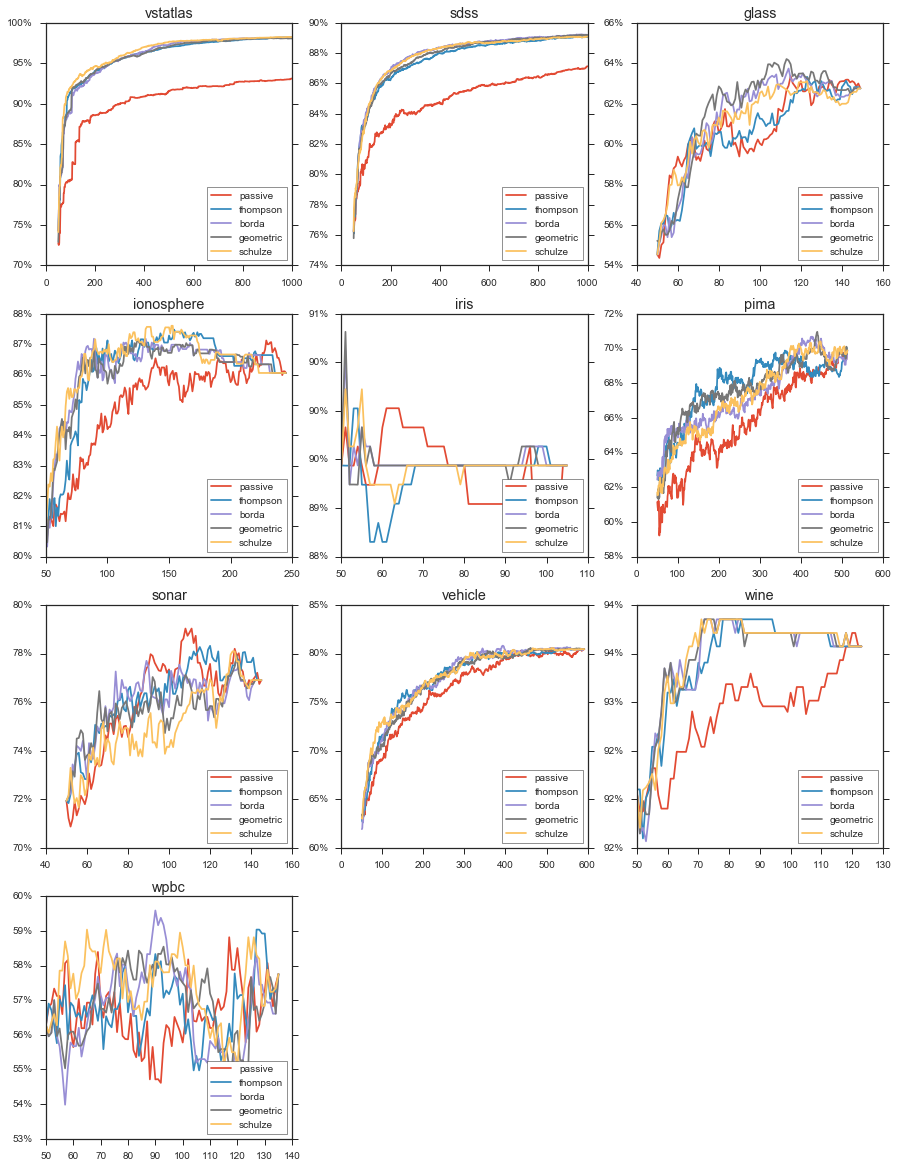

In [7]:
format_as_percent_plot = lambda x, pos: "{:.0f}%".format(x * 100)
fig = plt.figure(figsize=(15, 20))
for (i, dataset) in enumerate(datasets):
    learning_curves = {}
    for method in methods:
        learning_curves[method] = load_results(method, dataset, 'mpba')
    
    ax = fig.add_subplot(4, 3, i + 1)
    for method in methods:
        xticks = np.arange(50, 50 + len(learning_curves[method]))
        ax.plot(xticks, learning_curves[method], label=method)
        
    ax.legend(loc='lower right', frameon=True)
    ax.get_yaxis().set_major_formatter(FuncFormatter(format_as_percent_plot))
    ax.set_title(dataset)
    ax.tick_params(top='off')
#fig.savefig(fig_dir + 'active_learners.pdf', bbox_inches='tight')
plt.show()